In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import datetime

# Data preperation

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

### Create data frame from input file

In [3]:
df = pd.read_csv('building_data.csv').interpolate().fillna(-1)
df['Time'] = pd.to_datetime(df['Time'], infer_datetime_format=True)

In [4]:
df

,Time,Day,Price( $ per kWh),PV (W),Temperature in LA in 2012 (Celsius),Office_Elizabeth,Office_Ellie,Office_Evelyn,Office_Eileen,Office_Bobbi,Office_Benjamin,Office_Bianca,Office_Benthe,Office_Brian,Office_Bryon
0,2012-01-01 05:00:00+00:00,Sunday,0.08283,0.000,11.1,3.163383,6.970150,240.968342,-1.000000,-1.000,-1.00,-1.00000,-1.00,-1.00000,-1.000
1,2012-01-01 06:00:00+00:00,Sunday,0.08283,0.000,10.0,3.170692,6.780483,142.524367,-1.000000,-1.000,-1.00,-1.00000,-1.00,-1.00000,-1.000
2,2012-01-01 07:00:00+00:00,Sunday,0.08283,0.000,10.0,3.186217,6.970150,160.405408,-1.000000,-1.000,-1.00,-1.00000,-1.00,-1.00000,-1.000
3,2012-01-01 08:00:00+00:00,Sunday,0.08283,743.711,10.0,3.159733,6.685650,155.820508,-1.000000,41.775,44.75,19.56675,142.25,73.82075,273.150
4,2012-01-01 09:00:00+00:00,Sunday,0.08283,1479.480,10.0,3.167025,6.922733,150.711650,-1.000000,42.525,42.25,17.51600,143.00,74.88975,267.925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8774,2012-12-31 19:00:00+00:00,Monday,0.09690,0.000,14.4,11.650250,31.958475,272.997017,64.280192,46.025,54.00,19.69750,135.50,79.16700,238.175
8775,2012-12-31 20:00:00+00:00,Monday,0.09690,0.000,15.0,11.485775,32.432617,278.498908,64.156942,44.050,54.00,18.84550,137.00,79.64075,244.500
8776,2012-12-31 21:00:00+00:00,Monday,0.08283,0.000,15.0,11.485775,32.432617,278.498908,64.156942,46.450,53.25,19.05500,138.25,79.99925,246.450
8777,2012-12-31 22:00:00+00:00,Monday,0.08283,0.000,15.0,11.485775,32.432617,278.498908,64.156942,44.075,54.00,20.61675,141.50,85.80275,238.500


### Create melted data frame

In [5]:
melted = pd.melt(df, id_vars=['Time', 'Day', 'Price( $ per kWh)', 'PV (W)', 'Temperature in LA in 2012 (Celsius)'], var_name='Office Name', value_name='Power consumption (kWh)')

def filter_rows_by_values(df, col, values):
    return df[~df[col].isin(values)]

# Swap order so that
melted = melted.reindex(['Time', 'Day', 'Price( $ per kWh)', 'PV (W)', 'Temperature in LA in 2012 (Celsius)', 'Office Name', 'Power consumption (kWh)'], axis=1)

In [6]:

melted = filter_rows_by_values(melted, "Power consumption (kWh)", [-1])


In [7]:
melted

,Time,Day,Price( $ per kWh),PV (W),Temperature in LA in 2012 (Celsius),Office Name,Power consumption (kWh)
0,2012-01-01 05:00:00+00:00,Sunday,0.08283,0.000,11.1,Office_Elizabeth,3.163383
1,2012-01-01 06:00:00+00:00,Sunday,0.08283,0.000,10.0,Office_Elizabeth,3.170692
2,2012-01-01 07:00:00+00:00,Sunday,0.08283,0.000,10.0,Office_Elizabeth,3.186217
3,2012-01-01 08:00:00+00:00,Sunday,0.08283,743.711,10.0,Office_Elizabeth,3.159733
4,2012-01-01 09:00:00+00:00,Sunday,0.08283,1479.480,10.0,Office_Elizabeth,3.167025
...,...,...,...,...,...,...,...
87785,2012-12-31 19:00:00+00:00,Monday,0.09690,0.000,14.4,Office_Bryon,238.175000
87786,2012-12-31 20:00:00+00:00,Monday,0.09690,0.000,15.0,Office_Bryon,244.500000
87787,2012-12-31 21:00:00+00:00,Monday,0.08283,0.000,15.0,Office_Bryon,246.450000
87788,2012-12-31 22:00:00+00:00,Monday,0.08283,0.000,15.0,Office_Bryon,238.500000


### Add time variables

In [8]:
melted.insert(2, 'Day of Week', melted['Day'], True)
melted.insert(1, 'Day of Year', melted['Time'].map(lambda x: x.dayofyear), True)
melted.drop('Day', axis=1, inplace=True)
melted.insert(2, 'Hour', melted['Time'].map(lambda x: x.hour), True)

In [9]:
melted

,Time,Day of Year,Hour,Day of Week,Price( $ per kWh),PV (W),Temperature in LA in 2012 (Celsius),Office Name,Power consumption (kWh)
0,2012-01-01 05:00:00+00:00,1,5,Sunday,0.08283,0.000,11.1,Office_Elizabeth,3.163383
1,2012-01-01 06:00:00+00:00,1,6,Sunday,0.08283,0.000,10.0,Office_Elizabeth,3.170692
2,2012-01-01 07:00:00+00:00,1,7,Sunday,0.08283,0.000,10.0,Office_Elizabeth,3.186217
3,2012-01-01 08:00:00+00:00,1,8,Sunday,0.08283,743.711,10.0,Office_Elizabeth,3.159733
4,2012-01-01 09:00:00+00:00,1,9,Sunday,0.08283,1479.480,10.0,Office_Elizabeth,3.167025
...,...,...,...,...,...,...,...,...,...
87785,2012-12-31 19:00:00+00:00,366,19,Monday,0.09690,0.000,14.4,Office_Bryon,238.175000
87786,2012-12-31 20:00:00+00:00,366,20,Monday,0.09690,0.000,15.0,Office_Bryon,244.500000
87787,2012-12-31 21:00:00+00:00,366,21,Monday,0.08283,0.000,15.0,Office_Bryon,246.450000
87788,2012-12-31 22:00:00+00:00,366,22,Monday,0.08283,0.000,15.0,Office_Bryon,238.500000


### Encode and Scale data

In [10]:
# encode categorical data
encoder = LabelEncoder()
encoding_columns = ["Day of Week", "Office Name"]
for column in encoding_columns:
    melted[column] = encoder.fit_transform(melted[column]).astype('float32')

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
# these columns are NOT scaled
scalable_columns = melted.columns.difference(["Time", "Office Name"])
melted[scalable_columns] = scaler.fit_transform(melted[scalable_columns])

In [13]:
def office_label_function(labelEncoding):
    return encoder.inverse_transform([labelEncoding])[0]

def office_color_function(data_list):
    cmap = cm.Paired
    norm_col = Normalize(vmin=0, vmax=len(encoder.classes_))
    return cmap(norm_col(data_list))

def scatter_office(specific_ax, dataset):
    for c in encoder.transform(encoder.classes_):
        office_data = dataset[dataset['Office Name'].isin([c])]
        specific_ax.scatter(office_data.loc[:,'Time'],\
                   office_data.loc[:,'Power consumption (kWh)'],\
                   c=office_color_function(office_data.loc[:,'Office Name']),\
                   label=office_label_function(c))

### Resulting prepared data

In [12]:
prepared_data = melted.reset_index(inplace=False, drop=True)
prepared_data

,Time,Day of Year,Hour,Day of Week,Price( $ per kWh),PV (W),Temperature in LA in 2012 (Celsius),Office Name,Power consumption (kWh)
0,2012-01-01 05:00:00+00:00,0.0,0.217391,0.500000,0.028415,0.000000,0.549433,7.0,0.003100
1,2012-01-01 06:00:00+00:00,0.0,0.260870,0.500000,0.028415,0.000000,0.531605,7.0,0.003115
2,2012-01-01 07:00:00+00:00,0.0,0.304348,0.500000,0.028415,0.000000,0.531605,7.0,0.003148
3,2012-01-01 08:00:00+00:00,0.0,0.347826,0.500000,0.028415,0.223776,0.531605,7.0,0.003092
4,2012-01-01 09:00:00+00:00,0.0,0.391304,0.500000,0.028415,0.445162,0.531605,7.0,0.003108
...,...,...,...,...,...,...,...,...,...
87492,2012-12-31 19:00:00+00:00,1.0,0.826087,0.166667,0.090592,0.000000,0.602917,5.0,0.495268
87493,2012-12-31 20:00:00+00:00,1.0,0.869565,0.166667,0.090592,0.000000,0.612642,5.0,0.508514
87494,2012-12-31 21:00:00+00:00,1.0,0.913043,0.166667,0.028415,0.000000,0.612642,5.0,0.512598
87495,2012-12-31 22:00:00+00:00,1.0,0.956522,0.166667,0.028415,0.000000,0.612642,5.0,0.495949


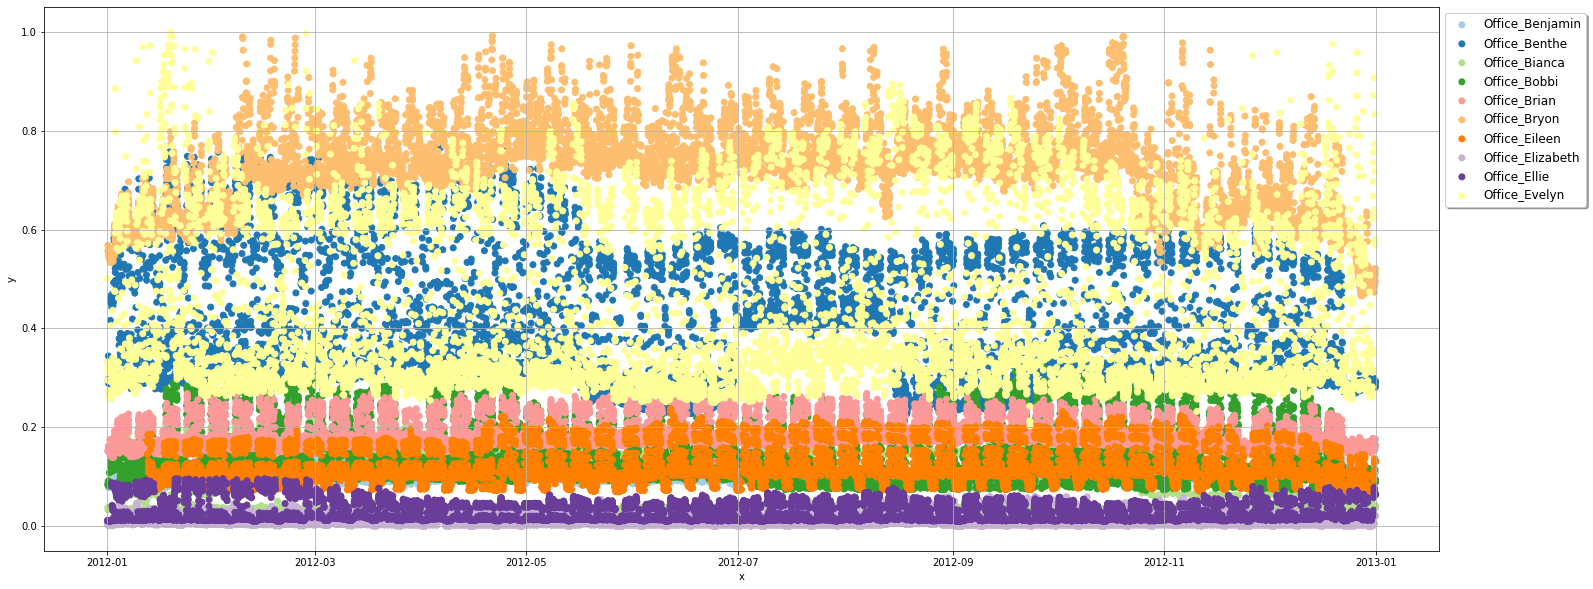

In [14]:
# Graph of prepared data (graph repeated later)
fig, ax = plt.subplots(figsize=(25,10))
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

scatter_office(ax, prepared_data)
ax.legend(fontsize='large',shadow=True, bbox_to_anchor=(1, 1))
plt.show()

# Learning Model

In [15]:
import tensorflow as tf
import tensorflow_probability as tfp
import math
from sklearn.utils import shuffle
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Layer, Input

### Universal Settings

In [16]:
training_data_percentage = 0.85
training_data_amount = math.floor(len(prepared_data)*training_data_percentage)
columns_to_ignore = ["Time", "Office Name"]

In [17]:
epochs = 50
batch_size = 50
learning_rate = 0.0003

In [18]:
def drop_cols(dataframe_to_change, columns_to_drop):
    for column in columns_to_drop:
        dataframe_to_change = dataframe_to_change.drop(column, axis=1)
    return dataframe_to_change

# Time based data set

### Prepare training and test time based data sets

In [19]:
timed_training_dataframe = prepared_data.loc[prepared_data["Day of Year"] < training_data_percentage]
timed_test_dataframe = prepared_data.loc[prepared_data["Day of Year"] >= training_data_percentage]

In [20]:
timed_train_labels = timed_training_dataframe.loc[:,'Time']
timed_test_labels = timed_test_dataframe.loc[:,'Time']

In [21]:
cleaned_timed_training_dataframe = drop_cols(timed_training_dataframe, columns_to_ignore)
cleaned_timed_test_dataframe = drop_cols(timed_test_dataframe, columns_to_ignore)

In [22]:
timed_training_data = cleaned_timed_training_dataframe.values
timed_test_data = cleaned_timed_test_dataframe.values
timed_train_x = timed_training_data[:,:-1]
timed_train_y = timed_training_data[:,-1]
timed_test_x = timed_test_data[:,:-1]
timed_test_y = timed_test_data[:,-1]

### Conduct training on time based data set

In [23]:
adamOptimizer = optimizers.Adam(learning_rate=learning_rate)
timed_model = Sequential()
timed_model.add(Dense(12,input_shape=(6,),activation="tanh"))
timed_model.add(Dense(12,activation="tanh"))
timed_model.add(Dense(1,activation="linear"))
timed_model.compile(loss='mse',optimizer=adamOptimizer,metrics=['mse'])
timed_history_cache = timed_model.fit(timed_train_x,
                          timed_train_y,
                          verbose=1, # write =1 if you wish to see the progress for each epoch
                          epochs=epochs,
                          batch_size=batch_size)
timed_y_pred = timed_model.predict(timed_test_x)

2021-10-13 20:15:34.794077: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-13 20:15:35.022754: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
1486/1486 [==============================] - 2s 1ms/step - loss: 0.0581 - mse: 0.0581A: 1s -
Epoch 2/50
1486/1486 [==============================] - 2s 1ms/step - loss: 0.0563 - mse: 0.0563
Epoch 3/50
1486/1486 [==============================] - 2s 1ms/step - loss: 0.0561 - mse: 0.0561
Epoch 4/50
1486/1486 [==============================] - 2s 1ms/step - loss: 0.0560 - mse: 0.0560
Epoch 5/50
1486/1486 [==============================] - 3s 2ms/step - loss: 0.0559 - mse: 0.0559A: 0s - loss: 0.0557 - 
Epoch 6/50
1486/1486 [==============================] - 2s 2ms/step - loss: 0.0559 - mse: 0.0559
Epoch 7/50
1486/1486 [==============================] - 2s 1ms/step - loss: 0.0559 - mse: 0.0559
Epoch 8/50
1486/1486 [==============================] - 2s 1ms/step - loss: 0.0559 - mse: 0.0559
Epoch 9/50
1486/1486 [==============================] - 1s 951us/step - loss: 0.0559 - mse: 0.0559
Epoch 10/50
1486/1486 [==============================] - 1s 866us/step - loss: 0.0559 - mse: 0.

### Graph result for time based data set

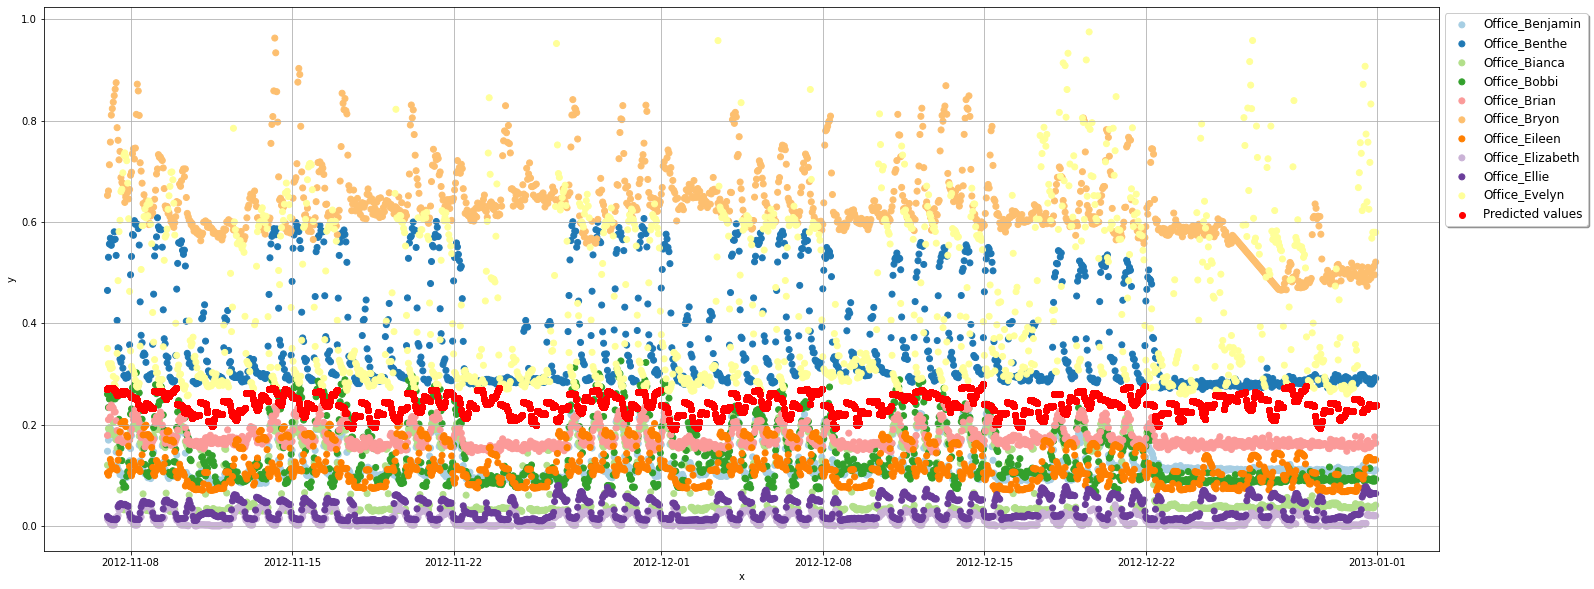

Final cost: 0.0557


In [24]:
fig, ax = plt.subplots(figsize=(25,10))
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

#ax.scatter(timed_test_labels,timed_test_dataframe.loc[:,'Power consumption (kWh)'],c=timed_test_dataframe.loc[:,'Office Name'],label='sampled data')
scatter_office(ax, timed_test_dataframe)
ax.scatter(timed_test_labels,timed_y_pred,c='r',label='Predicted values')
ax.legend(fontsize='large',shadow=True, bbox_to_anchor=(1, 1))
plt.show()
print('Final cost: {0:.4f}'.format(timed_history_cache.history['mse'][-1]))

### Graph all-time result for time based data set

In [25]:
timed_all_labels = np.concatenate((timed_train_labels,timed_test_labels))
timed_all_x = np.concatenate((timed_train_x, timed_test_x))
timed_all_y_pred = timed_model.predict(timed_all_x)

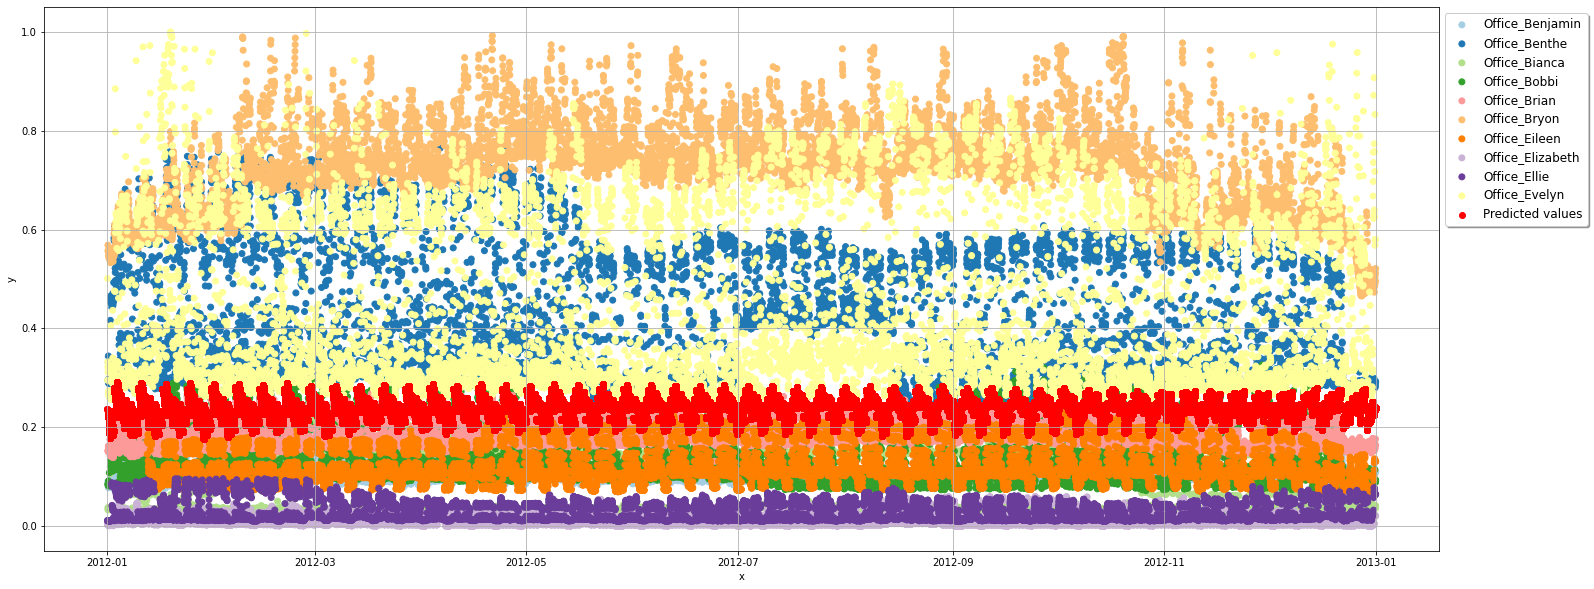

In [26]:
fig, ax = plt.subplots(figsize=(25,10))
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')

#ax.scatter(prepared_data.loc[:,'Time'],prepared_data.loc[:,'Power consumption (kWh)'],c=prepared_data.loc[:,'Office Name'],label='sampled data')
scatter_office(ax, prepared_data)
ax.scatter(timed_all_labels,timed_all_y_pred,c='r',label='Predicted values')
ax.legend(fontsize='large',shadow=True, bbox_to_anchor=(1, 1))
plt.show()

### Sanity check that timed based data is correct

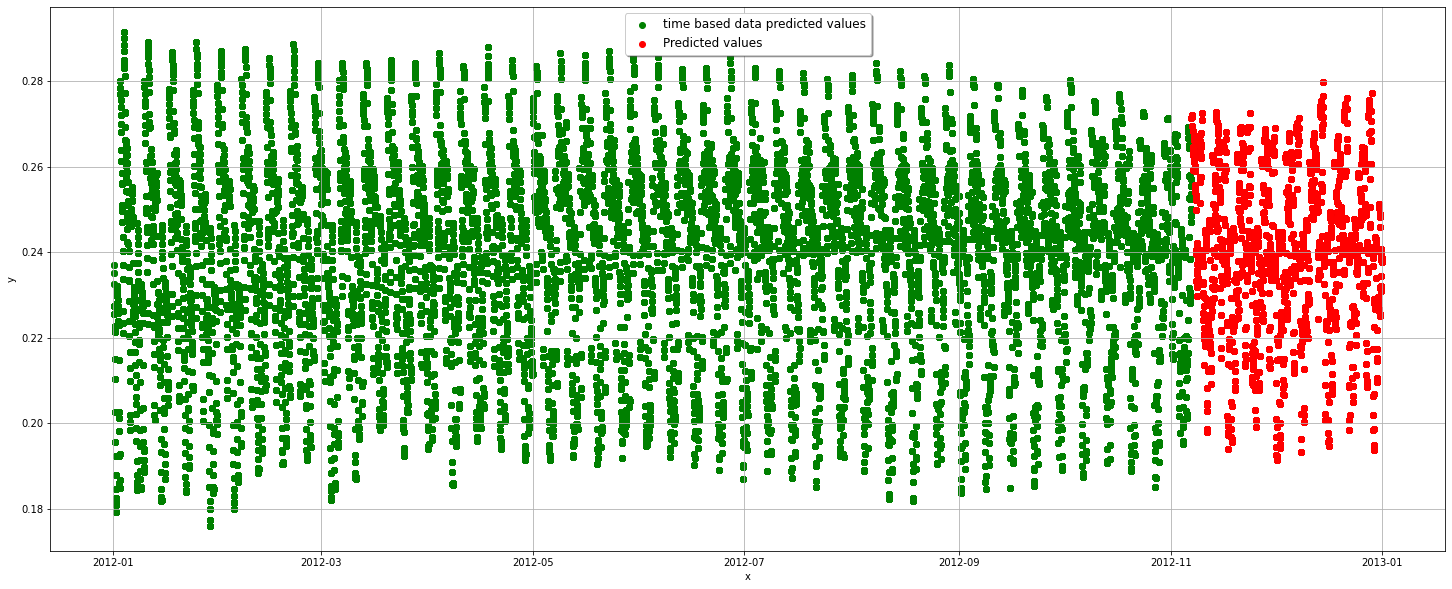

In [28]:
fig, ax = plt.subplots(figsize=(25,10))
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
ax.scatter(timed_all_labels,timed_all_y_pred,c='g',label='time based data predicted values')
ax.scatter(timed_test_labels,timed_y_pred,c='r',label='Predicted values')
ax.legend(loc='upper center',fontsize='large',shadow=True)
plt.show()